<a href="https://colab.research.google.com/github/johannes-kk/am207/blob/master/exercises/02_maximum_likelihood_estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAY 2: Maximum Likelihood Estimation


### AM207: Advanced Scientific Computing

#### Instructor: Weiwei Pan

#### Due: September 8th, 11:59pm EST

**Names of Group Members**:   
David Ma, david_ma@college.harvard.edu  
Will Seaton, wseaton@g.harvard,edu  
Minhuan Li, minhuanli@g.harvard.edu  
Wu You, youwu@g.harvard.edu)  
Preston Ching, pching@g.harvard.edu   
Johannes Kolberg, johanneskolberg@g.harvard.edu  

## Learning Goals:

1. empirically investigate the properties of maximum likelihood estimators.
2. gain intuition on why the three desiderata of estimators (consistency, unbiasedness and minimum variance) are useful or important in practice.
3. explore how to evaluate MLE models.

### Load necessary libraries

In [ ]:
# import the necessary python libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

### We include auxiliary functions here that we will need to use later 

In [ ]:
def generate_toy_data(n_samples=50, noise_var=0.5):
  ''' Generate toy data set for linear regression'''
  n_test_samples = 100
  f = lambda x: 0.5 * x + 10
  x_train = np.sort(np.random.uniform(-5, 5, n_samples))
  x_test = np.sort(np.random.uniform(-5, 5, n_test_samples))
  y_train = f(x_train) + np.random.normal(0, noise_var**0.5, n_samples)
  y_test = f(x_test) + np.random.normal(0, noise_var**0.5, n_test_samples)

  return x_train, y_train, x_test, y_test

---

## Problem 1: Maximum Likelihood Estimation of Parameters of a Univariate Normal Distribution

Suppose that we have $N$ number of observed values $y_1, \ldots, y_N$. Let's assume that these are idenpendent observations of a normally distributed random variable $Y \sim \mathcal{N}(\mu, \sigma^2)$. 

Recall that the maximum likelihood estimator of the underlying normal distribution are given by:

$$
\begin{cases}
\mu_{\text{MLE}} = \frac{1}{N} \sum_{n=1}^Ny_n &\\
\sigma_{\text{MLE}} = \sqrt{\frac{1}{N}\sum_{n=1}^N(y_n - \mu)^2}&
\end{cases}
$$

In this problem, you will explore the properties of maximum likelihood estimators.

**Exercise 1:** Use empricial evidence, determine whether or not the MLE of the mean $\mu$ and variance $\sigma^2_{\text{MLE}}$ are:
1. consistent
2. unbiased

Explain why we care about consistency and bias? That is, what concrete task(s) can go wrong if we use estimators that are not consistent and/or are biased?

In [ ]:
# Set constants for generating toy data
n_samples = 500 # number of training samples
noise_var = 0.5 # observation noise variance
# Generate training data
y_train = np.random.normal(0, noise_var**0.5, n_samples)

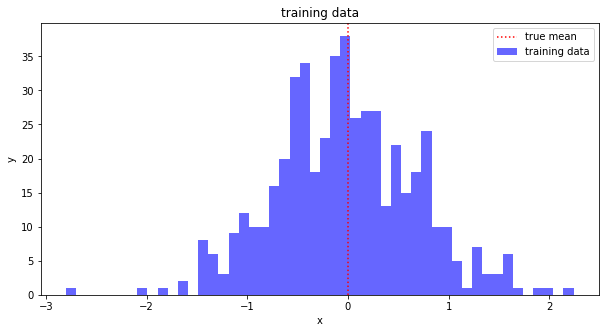

In [ ]:
# Visualize the training data
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5
ax.hist(y_train, bins=50, color='blue', alpha=0.6, label='training data') # scatter plot the training data
ax.axvline(x=0, color='red', linestyle='dotted', label='true mean') # plot the true mean 
ax.legend(loc='best') # plot legend
ax.set_title('training data') # set title
ax.set_xlabel('x') # set x label
ax.set_ylabel('y') # set y label
plt.show() # display the figure

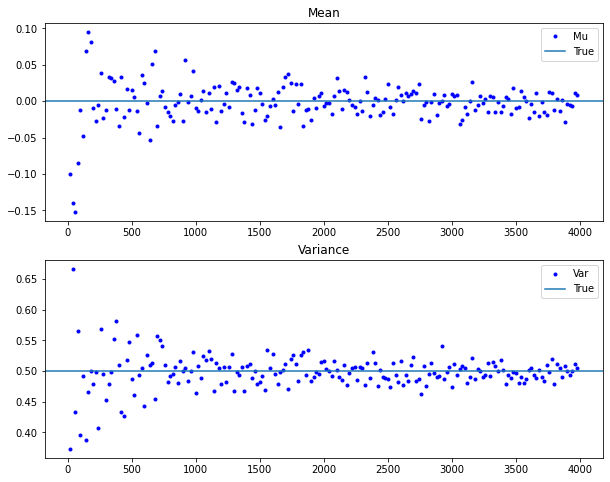

In [ ]:
# Check the consistency of MLE mean

mu_MLE = []
var_MLE = []
N_MIN = 20
N_MAX = 4000
STEP = 20
for n in range(N_MIN, N_MAX, STEP):
  y_train = np.random.normal(0, noise_var**0.5, n)
  mu_MLE.append(np.mean(y_train))
  var_MLE.append((1/n)*sum((y_train - np.mean(y_train))**2))

# plot the MLE estimator of mean as a function of sample number
fig, ax = plt.subplots(2, 1, figsize = (10, 8))

ax[0].plot(range(N_MIN, N_MAX, STEP), mu_MLE,'b.',label='Mu')
ax[0].axhline(0, label = 'True')
ax[0].legend()
ax[0].set_title('Mean')
ax[1].plot(range(N_MIN, N_MAX, STEP), var_MLE,'b.',label='Var')
ax[1].axhline(0.5, label = 'True')
ax[1].legend()
ax[1].set_title('Variance')

#plt.hlines(0,N_MIN-10,N_MAX+10,colors='red',linestyles='dotted', label='True Value')
#plt.xlabel('Sample Number n')
#plt.ylabel('MLE Estimator of mean')
#plt.title('Check Consistency of MLE Estimator of mean')

plt.show()

Both parameters are consistent as larger sample sizes converge around the true parameter values.

In [ ]:
# Check Unbiasedness of MLE Mean
SAMPLE_SIZE = 5
print(np.mean([np.mean(np.random.normal(0, 0.5**0.5, SAMPLE_SIZE)) for i in range(10000)]))

# Check Unbiasedness of MLE Variance
SAMPLE_SIZE = 5
print(np.mean([np.var(np.random.normal(0, 0.5**0.5, SAMPLE_SIZE)) for i in range(10000)]))

0.0005692984140775803
0.4000296572904525


$\hat\mu$ is unbiased as the expected value of resampling is the same as the true value. $\hat\sigma^2$ is *not* unbiased as the expected value differs: $0.4000 \neq 0.5$.

**Answer** 

Consistency and bias are two desiderata we apply to measure the quality of the estimator that we want to use. They are two dimensions along which we can determine whether the estimator we are using is trustworthy and valuable.

We care about consistency as otherwise, our estimators would not improve with increasing sample size. We care about bias when we have small sample size and cannot get consistent estimators from increasing the sample. Using a biased estimator could lead to wrong interpretations.

For bias, however, as long as we aware, can be accounted for by computing bounds for bias. In fact, a biased estimator with smaller variance may be preferred over an unbiased estimator.

**Exercise 2:** Part of the modeling process is model evaluation. Assuming that you've successfully maximized the log-likelihood of the data, why would you need to evaluate the MLE model (i.e. isn't the model you learned already gauranteed to fit the data as best as possible?)?

In the case of linear regression $p(y|x, \theta)$, we evaluate the fit of our MLE estimate $\theta_{\mathrm{MLE}}$ by computing the MSE. For models where we model the distribution of only one variable $p(y | \theta)$, how should we evaluate the fit of $\theta_{\mathrm{MLE}}$?

What is hard about evaluating the fit of $\theta_{\mathrm{MLE}}$ for models like $p(y | \theta)$? Is the same difficulty present in the case of linear regression?


**Answer:** It is important to evaluate a model because there is no guarantee that the model specified even fits the data (i.e., we calculated the MLE assume a Gaussian when the actual distribution is something else entirely). Furthermore, depending on our task, fitting the data may not be sufficient - we may wish to incorporate future data or make predictions, and just having MLE is insufficient for these tasks. 

We can evaluate the fit of $\theta_{\mathrm{MLE}}$ by calculating its confidence interval via bootstrapping. This allows us to quantify the uncertainty of our estimator. However, it is difficult to evaluate the fit since the length of the confidence interval does not tell us much about the fit. What we can do is compare whether the confidence intervals of different estimators overlap.

---

## Problem 2: Maximum Likelihood Estimation of Parameters of Linear Regression Model

In this problem, you will explore the properties of MLE of linear regression parameters. 

**Exercise 3:** Empricially determine whether or not the MLE of linear regression parameters are:
1. consistent
2. unbiased

In [ ]:
# Set constants for generating toy data
n_samples = 20 # number of training samples
noise_var = 0.5 # observation noise variance

# Generate training data
x_train, y_train, _, _ = generate_toy_data(n_samples=n_samples, noise_var=noise_var)

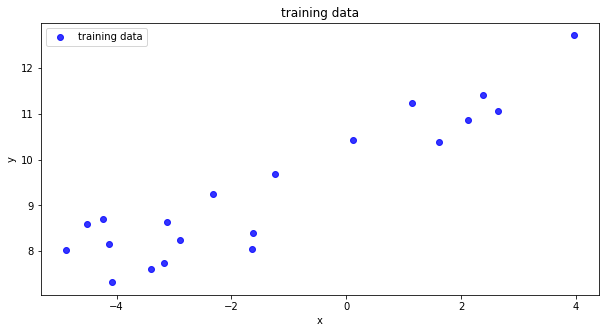

In [ ]:
# Visualize the training data
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5
ax.scatter(x_train, y_train, color='blue', alpha=0.8, label='training data') # scatter plot the training data
ax.legend(loc='best') # plot legend
ax.set_title('training data') # set title
ax.set_xlabel('x') # set x label
ax.set_ylabel('y') # set y label
plt.show() # display the figure

Text(0.5, 1.0, 'Slope')

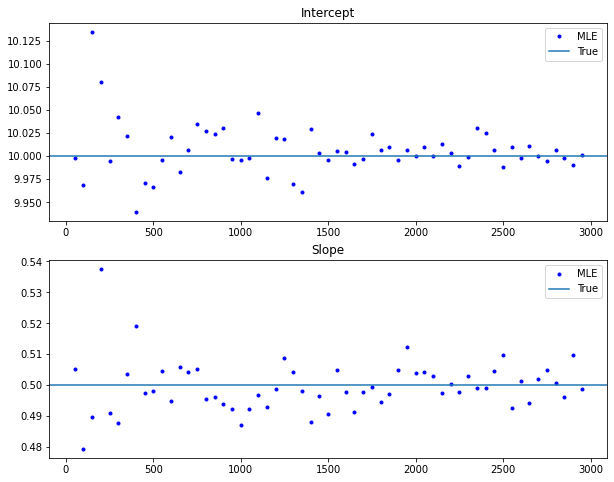

In [ ]:
np.random.seed(42)

a_MLE = []
b_MLE = []

N_MIN = 50
N_MAX = 3000

STEP = 50

for n in range(N_MIN, N_MAX, STEP):
  x_train, y_train, _, _ = generate_toy_data(n_samples=n, noise_var=0.5)

  lr = LinearRegression().fit(x_train.reshape((-1, 1)), y_train.reshape((-1, 1)))

  slope_mle = lr.coef_[0][0]
  intercept_mle = lr.intercept_[0]

  a_MLE.append(intercept_mle)
  b_MLE.append(slope_mle)

fig, ax = plt.subplots(2, 1, figsize = (10, 8))
ax[0].plot(range(N_MIN, N_MAX, STEP), a_MLE,'b.',label='MLE')
ax[0].axhline(10, label = 'True')
ax[0].legend()
ax[0].set_title('Intercept')
ax[1].plot(range(N_MIN, N_MAX, STEP), b_MLE,'b.',label='MLE')
ax[1].axhline(0.5, label = 'True')
ax[1].legend()
ax[1].set_title('Slope')

**Answer**: Consistent, as larger sample sizes converge around the true parameter value for both parameters.

In [ ]:
np.random.seed(1337)

n_samples = 10

intercepts = []
slopes = []

for i in range(1000):
  x_train, y_train, _, _ = generate_toy_data(n_samples=n_samples, noise_var=0.5)

  lr = LinearRegression().fit(x_train.reshape((-1, 1)), y_train.reshape((-1, 1)))

  slope_mle = lr.coef_[0][0]
  intercept_mle = lr.intercept_[0]

  intercepts.append(intercept_mle)
  slopes.append(slope_mle)

print('Intercept: {}\nSlope: {}'.format(np.mean(intercepts), np.mean(slopes)))

Intercept: 10.010877922889762
Slope: 0.49883416315462786


**Answer**: Unbiased as the expected value of resampling is the same as the true value.

**Exercise 4:** Empirically investigate the variance of the MLE of linear regression parameters. Specifically, describe which factors impact the variance and how.

 *Hint:* think about the impact of all the data generating parameters you can control. 

Explain why we care about variance in practice? That is, what concrete task(s) can go wrong if we use estimators that have high variance? 

In [ ]:
print('Intercpet: {}\nSlope: {}'.format(np.var(intercepts), np.var(slopes)))

Intercpet: 0.056016237103919314
Slope: 0.007154171967911464


**Answer**:
* Sample size: as sample size increases the variance of our estimator should fall.
* Noise generation: larger variance in the noise yields larger vairance in the estimator.

Intuitively, the variance of an estimator tells much how much spread there is in the estimates produced by that estimator. If we use estimators with high variance, then they become overly reliant on the variance of the noise and small changes in data and run the risk of overfitting.

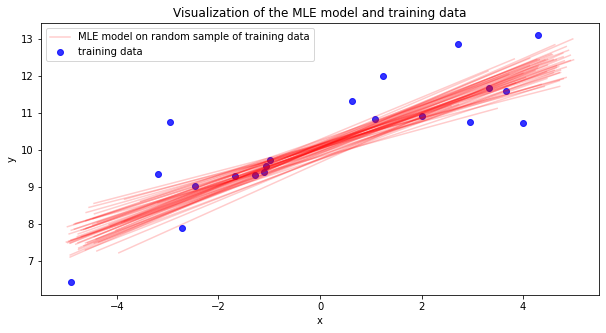

In [ ]:
# Visualize the MLE model
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5
ax.scatter(x_train, y_train, color='blue', alpha=0.8, label='training data') # scatter plot the training data

# Plot the MLE model for random samples of the training set
n_trials = 50
for i in range(n_trials):
  x_train, y_train, _, _ = generate_toy_data(n_samples=n_samples, noise_var=noise_var) # generate a random training samples from the true distribution over x
  linear_regressor.fit(x_train.reshape(-1, 1),y_train.reshape(-1, 1)) # fit model to the training data

  slope_mle = linear_regressor.coef_[0][0])# extract the MLE for slope
  intercept_mle = linear_regressor.intercept_[0] # extract the MLE for intercept

  y_train_pred = linear_regressor.predict(x_train.reshape(-1, 1)) # make predictions on training data 
  
  if i == 0:
    ax.plot(x_train, y_train_pred, color='red', alpha=0.2, label='MLE model on random sample of training data')  # plot the learned linear regression function by plotting the predictions
  else:
    ax.plot(x_train, y_train_pred, color='red', alpha=0.2)  # plot the learned linear regression function by plotting the predictions

ax.set_title('Visualization of the MLE model and training data') # set title
ax.legend(loc='best') # display legend
ax.set_xlabel('x') # set x label
ax.set_ylabel('y') # set y label
plt.show() # display the figure

**Exercise 5:** On a fixed data set, MSE is often used to rank different plausible models for the data. Can MSE be used to compare the fit of different models to different data sets? That is, if Model 1 has a lower MSE on Data Set 1 that Model 2 on Data Set 2, can we conclude that Model 1 fits the data better?

What about log-likelihood? That is, if Data Set 1 has a higher log-likelihood under MLE Model 1 than Data Set 2 has undert MLE Model 2, can we conclude that MLE Model 1 fits the data better?

**Answer:** It all depends on the data sets - for example, are Data set 1 and Data set 2 drawn from the same larger data set? Or are these two data sets extremely different? Are the input variables the same/would it be possible to retrain one of the models on the other data set and compare? Ultimately, MSE would probably be most useful in comparing models on a shared data set, and unless the two data sets are extremely similar, additional context is needed to better understand the relative performance. Just because one model has a lower MSE on a different data set does not mean model 1 fits the 'data' better - 'data' in this case is even quite ambiguous.

The same issue arises as above - the 'data' is ambiguous, and unless the two data sets are equal (or similarly-sized) subsets from a larger dataset, it's impossible to judge the comparative log-likelihoods.